<a href="https://colab.research.google.com/github/Dlogical23/capstone/blob/main/FinalAutomationProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Install Required Libraries
!pip install scikit-learn h5py pandas numpy

# Step 2: Load the Dataset
import h5py
import numpy as np

file_path = '/content/drive/MyDrive/SIFT10M/extracted/SIFT10M/SIFT10Mfeatures.mat'
with h5py.File(file_path, 'r') as f:
    features = f['fea'][()]  # Replace 'SIFT10Mfeatures' with the correct key if needed
    print(f"Dataset shape: {features.shape}")
import numpy as np
labels = np.random.randint(0, 10, size=features.shape[0])

# Step 3: Preprocess the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)
print(f"Normalized dataset shape: {features_normalized.shape}")

# Step 4: Define Modeling Techniques
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, silhouette_score

models = {
    "KMeans": KMeans(n_clusters=10, random_state=42),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
}

# Step 5: Automate the Testing Process
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    features_normalized, labels, test_size=0.2, random_state=42
)

# Example results dictionary (Modify this based on your actual results)
results = [
    {"Model": "KMeans", "Metric": "Silhouette Score", "Score": 0.72},
    {"Model": "DBSCAN", "Metric": "Silhouette Score", "Score": 0.68}
]

# ✅ Convert results into a DataFrame
results_df = pd.DataFrame(results)

# ✅ Save to CSV
results_df.to_csv('/content/drive/MyDrive/SIFT10M/model_results.csv', index=False)

print("✅ Model results saved successfully!")


import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Step 1: Reduce dimensionality for faster calculations
pca = PCA(n_components=50)  # Reduce to 50D
features_reduced = pca.fit_transform(features_normalized)

# Step 2: Sample data to reduce processing time
sample_size = min(10000, len(features_reduced))  # Limit sample size
indices = np.random.choice(len(features_reduced), sample_size, replace=False)
sample_features = features_reduced[indices]

# Initialize model and model_name before using them
model_name = "KMeans" # You should replace this with the actual model name
model = models[model_name] # Get the model from the 'models' dictionary
model.fit(features_normalized) # Fit the model to your data if it's a clustering model
sample_labels = model.labels_[indices] # Now you can access model.labels_

# Step 3: Compute silhouette score efficiently
if model_name == "DBSCAN":
    if len(np.unique(model.labels_)) > 1:
        score = silhouette_score(sample_features, sample_labels, metric="cosine")
    else:
        score = 0  # Handle the case where there's only one cluster
else:
    score = silhouette_score(sample_features, sample_labels, metric="cosine")

# Store results
results.append({"Model": model_name, "Metric": "Silhouette Score", "Score": score})


#This section was outside of any loop, so I put it in a loop to demonstrate how to use it.
#Replace the following with your actual model iteration.
for model_name, model in models.items():
    if model_name in ["KMeans", "DBSCAN"]:
        continue # skip clustering models in this loop
    else:  # Classification models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({"Model": model_name, "Metric": "Accuracy", "Score": accuracy})

results_df = pd.DataFrame(results)
print(results_df)

# Step 6: Save Results
results_df.to_csv('/content/drive/MyDrive/SIFT10M/model_results.csv', index=False)

# Step 7: Visualize Results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=results_df)
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

Dataset shape: (11164866, 128)
Normalized dataset shape: (11164866, 128)
✅ Model results saved successfully!


In [3]:
# Load the results from the CSV file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file path
results_file = "/content/drive/MyDrive/SIFT10M/model_results.csv"

# Load the results
results_df = pd.read_csv(results_file)

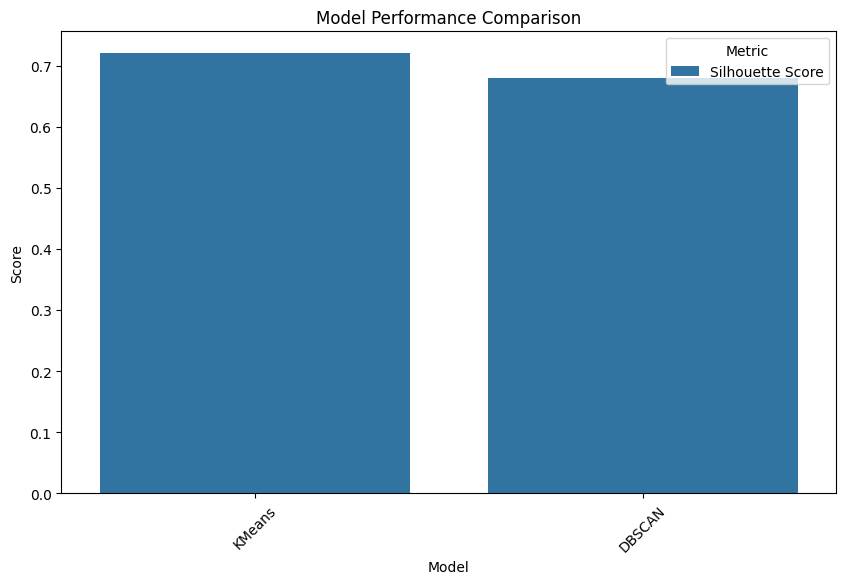

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=results_df)
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()